<a href="https://colab.research.google.com/github/AlanBarria/Prueba_1_ML/blob/main/Prueba_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguente script importa las librerias que se van a usar

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats  # Para análisis estadístico adicional

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analisis de datos

A continuacion vamos a llamar a el archivo .cvs desde una carpeta de google drive y muestra 10 valores de cada columna

In [6]:
#Llama al archivo .cvs a analizar desde una carpera en drive
url = '/content/drive/MyDrive/Machine_Learning/data.csv'
df = pd.read_csv(url, sep=",", encoding= 'latin1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


A continuacion veremos los tipos de datos que hay en el dataset

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

A cpntinuacion haremos un resumen estadistico del data set

In [8]:
display(df.describe(include='all'))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


# Analisis de variables numericas

A continuacion haremos un histograma para ver la curva de densidad de la columna UnitPrice en funcion de la frecuencia

Text(0, 0.5, 'Frecuencia')

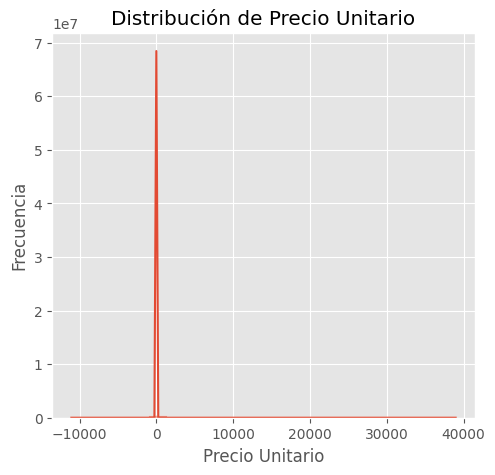

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['UnitPrice'], bins=20, kde=True)  # Histograma con curva de densidad
plt.title('Distribución de Precio Unitario')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')

A continuacion haremos un diagrama de densidad de la columna UnitPrice

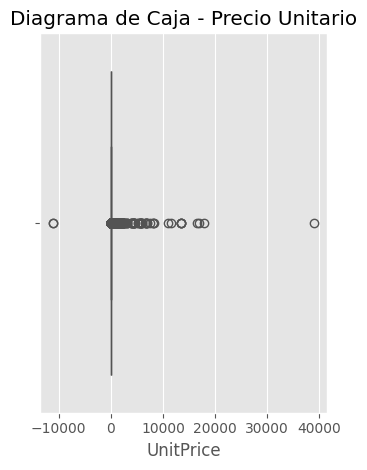

In [11]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])  # Diagrama de caja para identificar outliers
plt.title('Diagrama de Caja - Precio Unitario')
plt.tight_layout()
plt.show()

A continuacion haremos para saber las medidas estadisticas de UnitPrice

In [13]:
media = df['UnitPrice'].mean()
mediana = df['UnitPrice'].median()
moda = df['UnitPrice'].mode()[0]
q25, q75 = df['UnitPrice'].quantile([0.25, 0.75])
rango_intercuartil = q75 - q25

print("\nMEDIDAS DE TENDENCIA CENTRAL:")
print(f"Media: {media:.2f} (promedio)")
print(f"Mediana: {mediana:.2f} (valor central)")
print(f"Moda: {moda:.2f} (valor más frecuente)")

print("\nMEDIDAS DE DISPERSIÓN:")
print(f"Rango intercuartil (IQR): {rango_intercuartil:.2f} (diferencia entre Q3 y Q1)")
print(f"Desviación estándar: {df['UnitPrice'].std():.2f} (medida de variabilidad)")


MEDIDAS DE TENDENCIA CENTRAL:
Media: 4.61 (promedio)
Mediana: 2.08 (valor central)
Moda: 1.25 (valor más frecuente)

MEDIDAS DE DISPERSIÓN:
Rango intercuartil (IQR): 2.88 (diferencia entre Q3 y Q1)
Desviación estándar: 96.76 (medida de variabilidad)


# Relación entre variables

A continuacion haremos un diagrama de dispercion de UnitPrice en funcion de Quantity

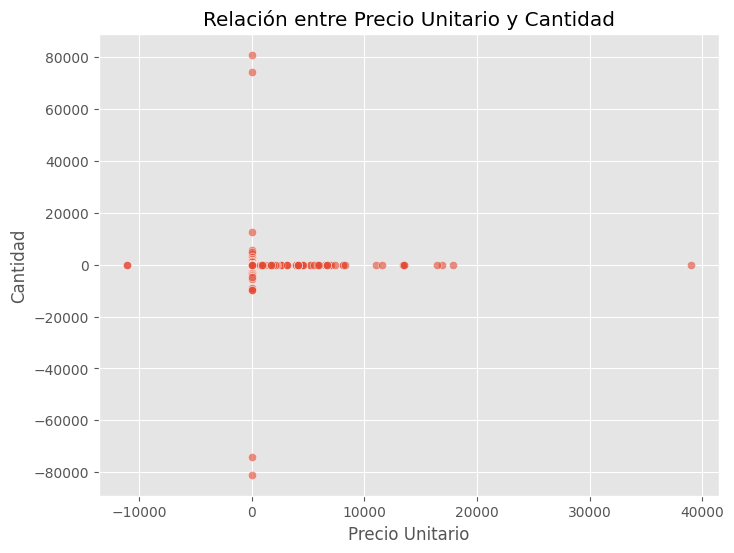

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', alpha=0.6)
plt.title('Relación entre Precio Unitario y Cantidad')
plt.xlabel('Precio Unitario')
plt.ylabel('Cantidad')
plt.show()

A continuacion calcularemos la correlacion entre UnitPrice y Quantity

In [25]:
corr, p_value = pearsonr(df['UnitPrice'], df['Quantity'])
print("\nCORRELACIÓN DE PEARSON:")
print(f"Coeficiente: {corr:.2f} (valores entre -1 y 1)")
print(f"Valor p: {p_value:.4f} (significancia estadística)")

print("\nNo existe correlacion entre UnitPrice y Quantity")


CORRELACIÓN DE PEARSON:
Coeficiente: -0.00 (valores entre -1 y 1)
Valor p: 0.3633 (significancia estadística)

No existe correlacion entre UnitPrice y Quantity
